# Introduction to Multilayer Perceptrons with PyTorch

In this notebook, we will:
1. Load and preprocess a digit classification dataset.
2. Get a quick introduction to PyTorch basics.
3. Implement a Multilayer Perceptron (MLP) for digit classification in PyTorch.

## Loading and Preprocessing the Digits Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (1437, 64)
Test shape: (360, 64)


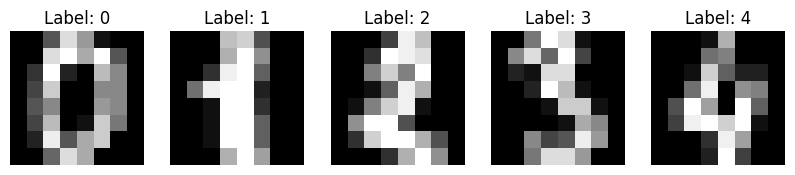

In [ ]:
def plot_digits(X, y, indices):
    n = len(indices)
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(indices):
        plt.subplot(1, n, i + 1)
        img = X[idx].reshape(8, 8)
        plt.imshow(img, cmap='gray')
        plt.title(f'Label: {y[idx]}')
        plt.axis('off')
    plt.show()

plot_digits(X, y, range(5))

## Quick Introduction to PyTorch

PyTorch is a popular deep learning framework that allows for:
- Flexible tensor computations (similar to NumPy but with GPU acceleration).
- Automatic differentiation via `autograd`.
- Easy model definition using `nn.Module`.

Here’s a quick demo of PyTorch basics.

In [ ]:
import torch

# AUTOGRAD EXAMPLE: derivative of f(x) = x^2 + 2x + 1
x = torch.tensor([3.0], requires_grad=True)
y = x**2 + 2*x + 1
y.backward()
print("df/dx at x=3 (autograd):", x.grad.item())

# BASIC TENSOR SHAPES AND OPERATIONS
t = torch.randn(8, 2, 4)
print("shape:", t.shape)

# view / reshape
t2 = t.reshape(8, -1)
print("reshape:", t2.shape)

# permute (reorder dimensions)
t3 = t.permute(0, 2, 1)
print("permute:", t3.shape)

# unsqueeze / squeeze
v = torch.randn(10)
v_u = v.unsqueeze(0)
print("unsqueeze:", v_u.shape)

# repeat (replication)
a = torch.tensor([[1., 2.]])
a_rep = a.repeat(3, 1)
print("repeat:\n", a_rep)

# matrix multiplication (@ is equivalent to torch.matmul)
A = torch.randn(5, 3)
B = torch.randn(3, 4)
C = A @ B
print("matmul shape:", C.shape)

# scatter: simple one-hot encoding
idx = torch.tensor([2, 0, 1])
one_hot = torch.zeros(3, 3)
one_hot.scatter_(1, idx.unsqueeze(1), 1.)
print("one-hot:\n", one_hot)

df/dx at x=3 (autograd): 8.0
shape: torch.Size([8, 2, 4])
reshape: torch.Size([8, 8])
permute: torch.Size([8, 4, 2])
unsqueeze: torch.Size([1, 10])
repeat:
 tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])
matmul shape: torch.Size([5, 4])
one-hot:
 tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Convert training data to torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(np.argmax(y_train, axis=1), dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Check a batch
for batch_X, batch_y in train_loader:
    print(batch_X.shape, batch_y.shape)
    break

torch.Size([32, 64]) torch.Size([32])


## Building an MLP in PyTorch (Guided Example)

We will create a simple MLP with:
- Input layer: 64 features (8x8 image flattened)
- Hidden layer: 128 neurons, ReLU activation
- Output layer: 10 classes (digits 0–9)

In [ ]:
import torch.nn as nn
import torch.optim as optim

class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # raw logits
        return x

# Instantiate model, loss, optimizer
model = DigitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 1.0547
Epoch 2, Loss: 0.4560
Epoch 3, Loss: 0.2937
Epoch 4, Loss: 0.3917
Epoch 5, Loss: 0.1000


In [ ]:
# Convert test data
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long)

# Evaluate accuracy
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    acc = (predicted == y_test_tensor).float().mean().item()
    print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9667


### Exercises

1. MLP from scratch
   - Reimplement the above PyTorch MLP without looking at the provided code.
   - Aim for 97% accuracy.

2. Bonus
   - Apply the same MLP architecture to the MNIST dataset (28x28 images).
   - Compare results with Digits.